In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as ske
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [40]:
train = pd.read_csv("~/Documents/utkml_examples/titanic/train.csv")
test = pd.read_csv("~/Documents/utkml_examples/titanic/test.csv")

In [41]:
# Take a look at the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
train.describe()

/Users/youngtodd/anaconda3/envs/cs526/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
# What proportion of people survived?
train['Survived'].mean()

0.3838383838383838

In [44]:
# Does class have anything to do with survival?
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [45]:
# What happens if we consider sex as well?
train.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

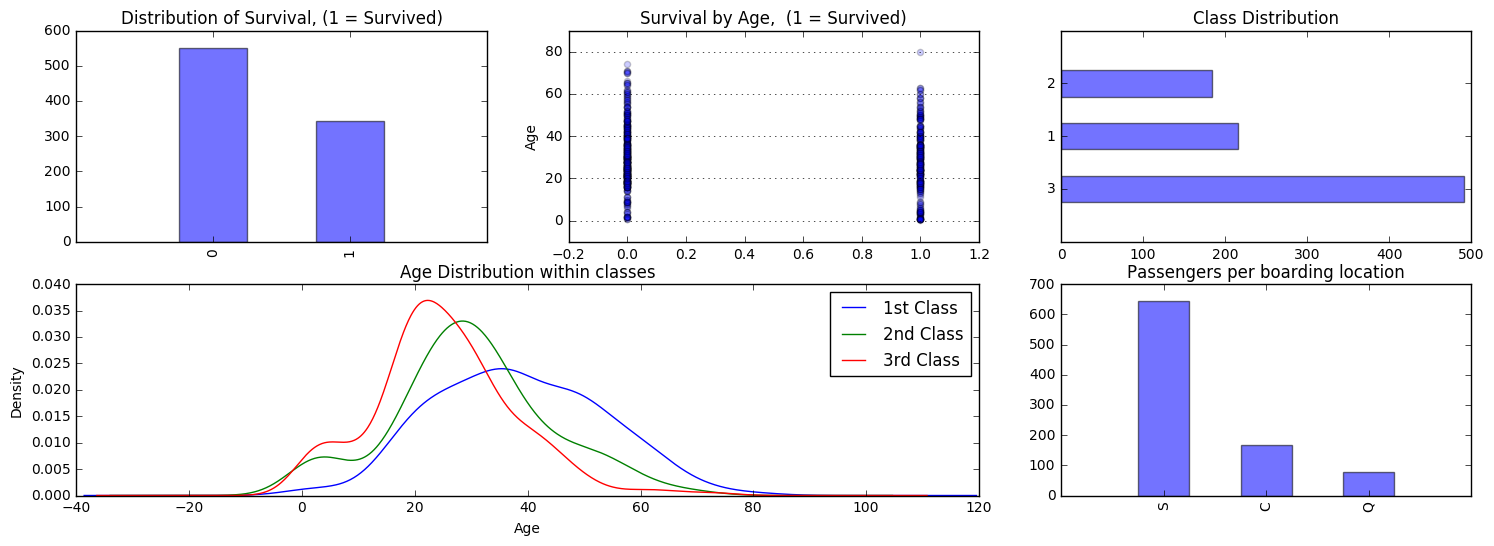

In [46]:
# Exploratory Plots 
# -------- 

%matplotlib inline

# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
train.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(train.Survived, train.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
train.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(train.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
train.Age[train.Pclass == 1].plot(kind='kde')    
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(train.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

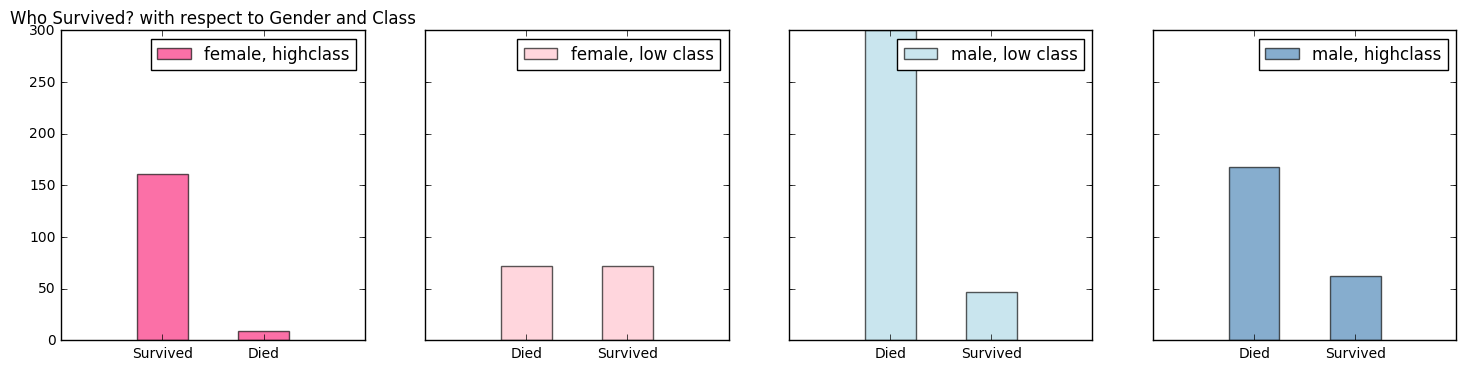

In [47]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

In [48]:
# Initial Data Cleaning
# --------

# Ticket and Cabin features have a lot of missing values
# Let's start simple and drop them from the data.
train = train.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis=1)
test = test.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis=1)

In [49]:
# Data Preparation
# --------

train = train.drop(['Embarked'], axis=1)

def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = ske.preprocessing.LabelEncoder()
    processed_df.Sex = le.fit_transform(processed_df.Sex)
    #processed_df.Embarked = le.fit_transform(processed_df.Embarked)
    return processed_df

processed_train = preprocess_titanic_df(train)
processed_test = preprocess_titanic_df(test)

processed_train.fillna(0, inplace=True)
processed_test.fillna(0, inplace=True)

X = processed_train.drop(['Survived'], axis=1).values
y = processed_train['Survived'].values

X_train, X_test, y_train, y_test = ske.cross_validation.train_test_split(X,y,test_size=0.2)
    

In [50]:
# Our first model: Decision Tree
# --------

clf_dt = ske.tree.DecisionTreeClassifier(max_depth=10)

clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

shuffle_validator = ske.cross_validation.ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)

def test_classifier(clf):
    scores = ske.cross_validation.cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

test_classifier(clf_dt)

Accuracy: 0.8070 (+/- 0.03)


In [51]:
# You relied on a single tree? We have a forest!
clf_rf = RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)

Accuracy: 0.8240 (+/- 0.02)


In [52]:
# Gradient boosted tree?
clf_gb = GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)

Accuracy: 0.8302 (+/- 0.02)
